In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
dataset = pd.read_csv('Iris.csv')

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [35]:
dataset.shape

(150, 6)

In [36]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [37]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [38]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [39]:
dataset.drop(columns='Id', inplace=True)

In [40]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
features = dataset.drop(columns='Species')

target = dataset['Species']

In [42]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [43]:
model = DecisionTreeClassifier(random_state=42)
model.fit(features_train, target_train)

print(f'The accuracy of this Decision Tree model is {model.score(features_test, target_test) * 100}%')


The accuracy of this Decision Tree model is 100.0%


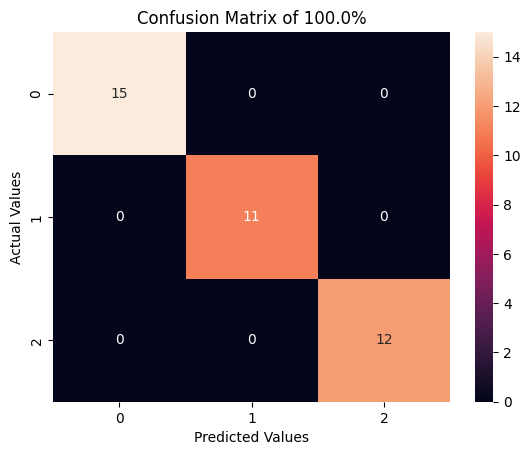

In [44]:
prediction = model.predict(features_test)
conf_mat = confusion_matrix(target_test, prediction)

sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title(f'Confusion Matrix of {model.score(features_test, target_test) * 100}%')
plt.show()

In [45]:
print(classification_report(target_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



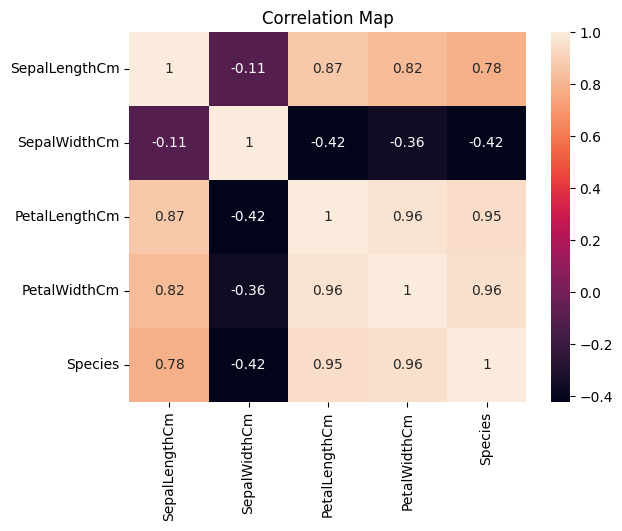

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['Species'] = le.fit_transform(dataset['Species'])
sns.heatmap(dataset.corr(), annot=True)
plt.title('Correlation Map')
plt.show()